## IMPLEMENTING MACHINE LEARNING TECHNIQUES FOR CANCER PROGNOSIS
---

**Group members: Kaushal Chaudhary, Gauresh Chavan, Mohit Ruke**

__ABSTRACT__

This research project presents an application of three machine learning (ML) algorithms: Logistic Regression on the Wisconsin Diagnostic Breast Cancer (WDBC) , Extra Tree Classifier on Wisconsin Prognostic Breast Cancer (WPBCC) dataset and Support Vector Classifier (SVC) on WPBC by measuring their classification test accuracy, and their sensitivity and specificity values. 

__INTRODUCTION__

Breast Cancer is the most common form of cancer in women, affecting almost 12% of all women across the world. In recent years, the incidence rate keeps increasing and data show that the survival rate is 88% after first five years from diagnosis and 80% after 10 years from diagnosis. Early prediction of cancer is one of the most crucial steps in the follow-up process [3]. Over past few decades, scientists applied different methods, such as screening in early stage, so that types of cancer can be identifies before their symptoms. With advent of new technologies, a large amounts of cancer data are available to the research community. However, an accurate prediction of a disease outcome is still one of the challenging tasks for the researchers and physicians around the world [2]. In this paper, we will develop, using machine learning techniques, methods that will allow accurate prognosis of cancer. 

__BACKGROUND__ 

Today, despite the many advances in early detection of diseases, cancer patients have a poor prognosis and the survival rates in them are low [1]. In cancer prediction/prognosis one is concerned with the following [4]: 

> 1) classification of tumor type

> 2) prediction of cancer recurrence and 

> 3) prediction of cancer survivability. 

In the first case, one is trying to predict the type of tumor (malign or benign) prior to the occurrence of the disease. In the second case one is trying to predict the likelihood of redeveloping cancer. In the third case one is trying to predict an outcome (life expectancy, survivability, progression, tumor-drug sensitivity) after the diagnosis of the disease. In the latter two situations the success of the prognostic prediction is obviously dependent on the success or quality of the diagnosis [4].

__DATA SOURCES__

_Cancer detection:_

[UCI Machine Learning Repository : Wisconsin Diagnostic Dataset for Breast Cancer (WDBC)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))

[Cancer Recurrence and Survivability](ftp://ftp.cs.wisc.edu/math-prog/cpo-dataset/machine-learn/cancer/WPBCC/) 

__REFERENCES__

 > [1] [Azadeh Bashiri, Marjan Ghazisaeedi,* Reza Safdari, Leila Shahmoradi, and Hamide Ehtesham .Improving the Prediction of Survival in Cancer Patients by Using Machine Learning Techniques: Experience of Gene Expression Data: A Narrative Review](http://ijph.tums.ac.ir/index.php/ijph/article/view/9044)
 
 > [2] [Konstantina Kourou, Themis P. Exarchos, Konstantinos P. Exarchos, Michalis V. Karamouzis, Dimitros I. Fotiadis. Machine learning applications in cancer prognosis and prediction](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4348437/)
 
 > [3] [Using Three Machine Learning Techniques for Predicting Breast Cancer Recurrence Ahmad LG*, Eshlaghy AT, Poorebrahimi A, Ebrahimi M and Razavi AR](https://www.omicsonline.org/using-three-machine-learning-techniques-for-predicting-breast-cancer-2157-7420.1000124.php?aid=13087)
 
 > [4] [Applications of Machine Learning in Cancer Prediction and Prognosis Joseph A. Cruz and David S. Wishart](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2675494/)
 
 > [5] [On Breast Cancer Detection: An Application of Machine Learning Algorithms on the Wisconsin Diagnostic Dataset Abien Fred M. Agarap](https://arxiv.org/pdf/1711.07831.pdf)



The text in the document by Gauresh Chavan, Kaushal Chaudhary and Mohit Ruke is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/

The code in the document by Gauresh Chavan, Kaushal Chaudhary and Mohit Ruke is licensed under the MIT License https://opensource.org/licenses/MIT



## PART A: CLASSIFICATION OF TUMOR 
---

**Importing useful packages**

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

**Reading data from CSV**

In [12]:
cancer = pd.read_csv("cancer.csv")
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [35]:
cancer.shape

(569, 32)

In [36]:
cancer.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


The **diagnosis** column in our data contains string values which needs to be converted into binary integer values our logistic model to process. If the tumor is malignant, result = 1 else 0

In [13]:
def converter(result):
    if result=='M':
        return 1
    else:
        return 0

In [14]:
cancer['result'] = cancer['diagnosis'].apply(converter)

In [15]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,result
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


### TPOT:

Credits:[Randal Olson TPOT](http://www.randalolson.com/2015/11/15/introducing-tpot-the-data-science-assistant/)

TPOT is a Python Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming.
TPOT will automate the most tedious part of machine learning by intelligently exploring thousands of possible pipelines to find the best one for our data.Once TPOT is finished searching, it provides us with the Python code for the best pipeline it found so you can tinker with the pipeline from there.

In [18]:
from tpot import TPOTClassifier
from sklearn.feature_selection import RFE

In [19]:
X = cancer[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y = cancer['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
tpot = TPOTClassifier(generations=10, population_size=10, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))

Generation 1 - Current best internal CV score: 0.977560165650883


Generation 2 - Current best internal CV score: 0.977560165650883


Generation 3 - Current best internal CV score: 0.977560165650883


Generation 4 - Current best internal CV score: 0.977560165650883


Generation 5 - Current best internal CV score: 0.977560165650883


Generation 6 - Current best internal CV score: 0.9800293014533521


Generation 7 - Current best internal CV score: 0.9800293014533521


Generation 8 - Current best internal CV score: 0.9800293014533521


Generation 9 - Current best internal CV score: 0.9800293014533521


Generation 10 - Current best internal CV score: 0.9800293014533521



Best pipeline: LogisticRegression(MinMaxScaler(input_matrix), C=20.0, dual=True, penalty=l2)
0.970760233918


### LOGISTIC REGRESSION 
---

In [21]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

X = cancer[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y = cancer['result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

log_reg = linear_model.LogisticRegressionCV()
log_reg.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [97]:
print('Accuracy on the training subset: {:.3f}'.format(log_reg.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg.score(X_test, y_test)))

Accuracy on the training subset: 0.977
Accuracy on the test subset: 0.947


**Regularization**

We will be using L2 (ridge) regularization that comes default with the LogisticRegression() from Scikit-Learn and. We will play along with C value - a parameter to control the strength of regularization and see if Regularization helps our model.

- Higher C : correct classification of each data point
- Lower C: Logmodel adjusts to the majority of the data point


In [105]:
log_reg100 = LogisticRegression(C=100)
log_reg100.fit(X_train, y_train)
print('Accuracy on the training subset: {:.3f}'.format(log_reg100.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg100.score(X_test, y_test)))

Accuracy on the training subset: 0.980
Accuracy on the test subset: 0.959


In [106]:
log_reg001 = LogisticRegression(C=0.01)
log_reg001.fit(X_train, y_train)
print('Accuracy on the training subset: {:.3f}'.format(log_reg001.score(X_train, y_train)))
print('Accuracy on the test subset: {:.3f}'.format(log_reg001.score(X_test, y_test)))

Accuracy on the training subset: 0.942
Accuracy on the test subset: 0.918


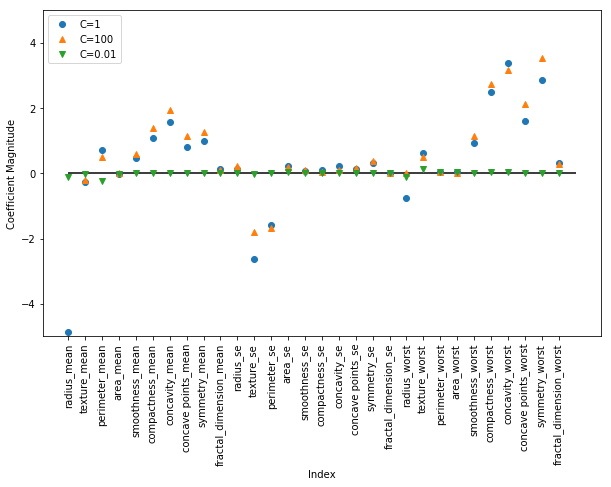

In [107]:
plt.figure(figsize=(10,6))
plt.plot(log_reg.coef_.T, 'o', label='C=1')
plt.plot(log_reg100.coef_.T, '^', label='C=100')
plt.plot(log_reg001.coef_.T, 'v', label='C=0.01')
plt.xticks(range(X.shape[1]), X, rotation=90)
plt.hlines(0,0, X.shape[1])
plt.ylim(-5,5)
plt.xlabel('Index')
plt.ylabel('Coefficient Magnitude')
plt.legend()

**Model Evaluation**

A better metric for binary classifiers is AUC or Area under curve. For that we first have a look at the classification report of our model. _Precision_ and _Recall_ are two important values to observe.

- Precision (relevancy) : fraction of correctly identified examples of a class (ratio of true positives to all positives)
- Recall (completeness) : fraction of observations classified in that class that were correctly identified

In [108]:
print ("---Logistic Model---")
log_roc_auc001 = roc_auc_score(y_test, log_reg001.predict(X_test))
print ("Logistic_001 AUC: ", log_roc_auc001 )
print(classification_report(y_test,log_reg001.predict(X_test)))

print ("---Logistic Model---")
log_roc_auc100 = roc_auc_score(y_test, log_reg100.predict(X_test))
print ("Logistic_100 AUC: ", log_roc_auc100 )
print(classification_report(y_test,log_reg100.predict(X_test)))

print ("---Logistic Model---")
log_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
print ("Logistic AUC: ", log_roc_auc )
print(classification_report(y_test,log_reg.predict(X_test)))

---Logistic Model---
Logistic_001 AUC:  0.908008658009
             precision    recall  f1-score   support

          0       0.92      0.95      0.93       105
          1       0.92      0.86      0.89        66

avg / total       0.92      0.92      0.92       171

---Logistic Model---
Logistic_100 AUC:  0.949783549784
             precision    recall  f1-score   support

          0       0.95      0.99      0.97       105
          1       0.98      0.91      0.94        66

avg / total       0.96      0.96      0.96       171

---Logistic Model---
Logistic AUC:  0.94025974026
             precision    recall  f1-score   support

          0       0.94      0.97      0.96       105
          1       0.95      0.91      0.93        66

avg / total       0.95      0.95      0.95       171



**Plotting ROC curve**

In [109]:
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
fpr100, tpr100, thresholds100 = roc_curve(y_test, log_reg100.predict_proba(X_test)[:,1])
fpr001, tpr001, thresholds001 = roc_curve(y_test, log_reg001.predict_proba(X_test)[:,1])

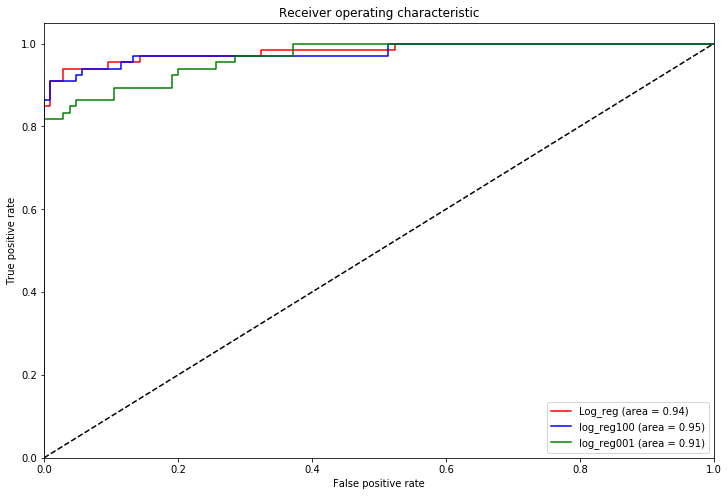

In [110]:
plt.figure(figsize = (12,8))
plt.plot(fpr, tpr, label ="Log_reg (area = %0.2f)" % log_roc_auc, color ="red")
plt.plot(fpr100, tpr100, label ="log_reg100 (area = %0.2f)" % log_roc_auc100, color ="blue")
plt.plot(fpr001, tpr001, label ="log_reg001 (area = %0.2f)" % log_roc_auc001, color ="green")
plt.plot([0,1],[0,1], 'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 